In [100]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [156]:
def extract_melspec(song, n_fft=1024, hop_length=512, log_scale=True):
    melspec = librosa.feature.melspectrogram(song, n_fft=n_fft, hop_length=hop_length)
    
    if log_scale:
        melspec = librosa.amplitude_to_db(melspec**2)  # log scale melspec
    return melspec

In [157]:
def splitsongs(X, y, window=0.1, overlap=0.5):
    # split song samples into overlapping windows
    # Empty lists to hold our results
    temp_X = []
    temp_y = []

    # Get the input song array size
    xshape = X.shape[0]
    chunk = int(xshape * window)
    offset = int(chunk * (1. - overlap))

    # Split the song and create new ones on windows
    spsong = [X[i:i + chunk] for i in range(0, xshape - chunk + offset, offset)]
    for s in spsong:
        temp_X.append(s)
        temp_y.append(y)

    return np.array(temp_X), np.array(temp_y)


In [158]:
def sample_windows_to_melspecs(songs):
    melspecs = map(extract_melspec, songs)
    return np.array(list(melspecs))

In [159]:
song_path = os.path.join(os.getcwd(), 'example_songs', 'get-you.mp3')
samples, sr = librosa.load(song_path, sr=22050, offset=120.0,duration=5)
samples = samples[:66000]

In [160]:
melspec = extract_melspec(samples)
melspec.shape

(128, 129)

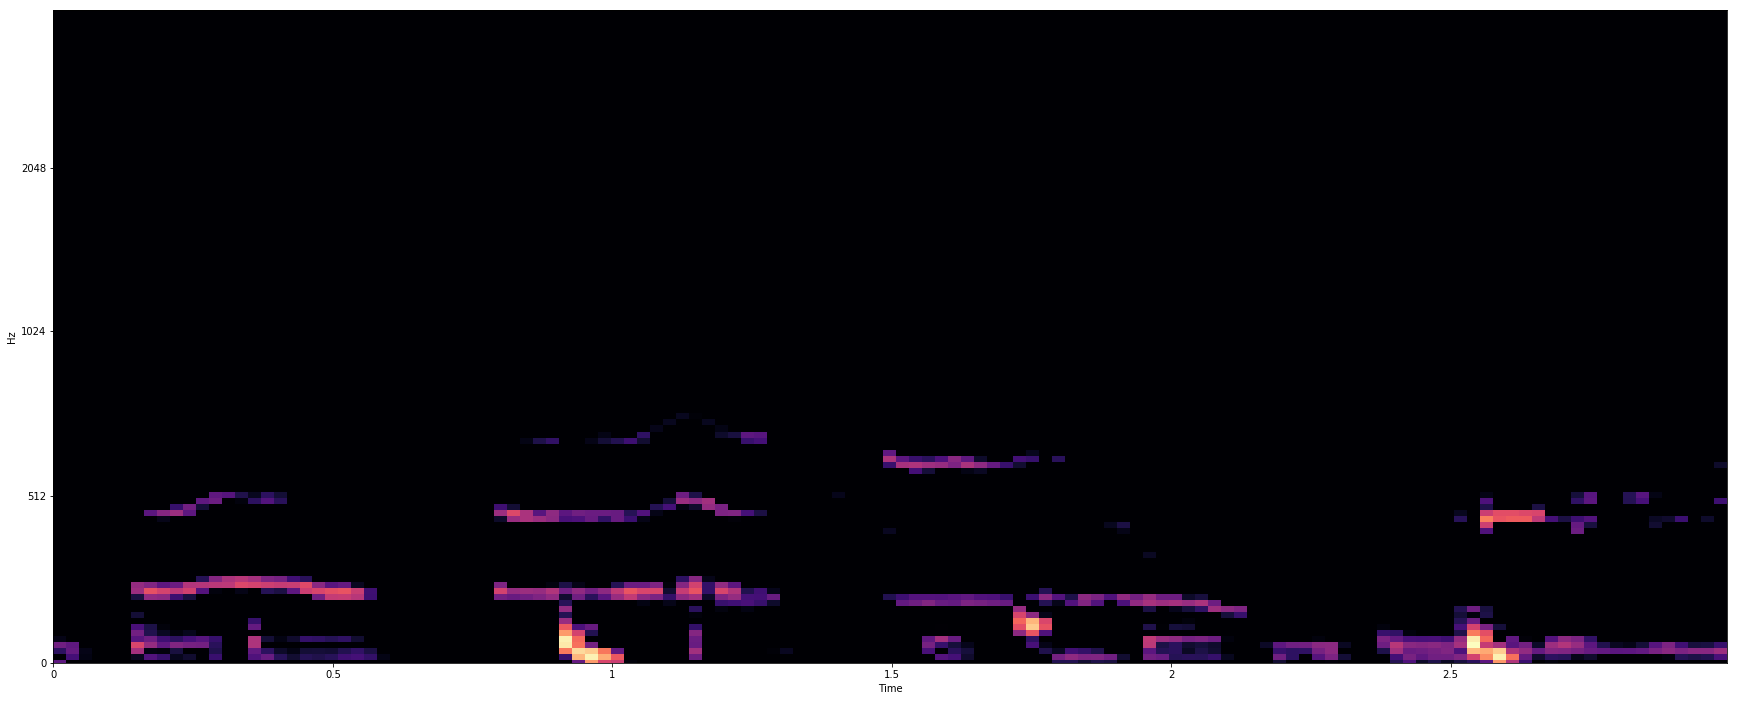

In [167]:
plt.figure(figsize=(30, 12))
plt.tight_layout()
melspec_db = librosa.power_to_db(melspec, ref=np.max)
librosa.display.specshow(melspec_db, x_axis='time', y_axis='mel', sr=sr, fmax=4000)

In [162]:
# working aroud small implementation detail here, the melspec that feeds into the network has to have a third dimension of 1
melspec_for_predicting = melspec[:, :, np.newaxis]
melspec_for_predicting.shape

(128, 129, 1)